# ML Example using Linear Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics
from sklearn.metrics import classification_report
import scikitplot as skplt

In [26]:
df = pd.read_csv("heartdisease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


Inspect & Wrangle dataa

In [27]:
# correlation matrix
corrMatrix = df.corr()
print (corrMatrix)
round(corrMatrix,2)

                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017352       0.197596    0.317930   
age             -0.028979  1.000000  -0.165883      -0.213748   -0.192791   
education        0.017352 -0.165883   1.000000       0.018532    0.008085   
currentSmoker    0.197596 -0.213748   0.018532       1.000000    0.769690   
cigsPerDay       0.317930 -0.192791   0.008085       0.769690    1.000000   
BPMeds          -0.052506  0.122995  -0.010815      -0.048938   -0.046134   
prevalentStroke -0.004546  0.057655  -0.035112      -0.032988   -0.032707   
prevalentHyp     0.005313  0.307194  -0.081970      -0.103260   -0.066146   
diabetes         0.015708  0.101258  -0.038680      -0.044295   -0.037067   
totChol         -0.070322  0.262131  -0.023115      -0.046562   -0.026320   
sysBP           -0.035989  0.394302  -0.129631      -0.130230   -0.088780   
diaBP            0.057933  0.206104  -0.062316      -0.107746   -0.056632   

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.00,-0.03,0.02,0.20,0.32,-0.05,-0.00,0.01,0.02,-0.07,-0.04,0.06,0.08,-0.12,0.01,0.09
age,-0.03,1.00,-0.17,-0.21,-0.19,0.12,0.06,0.31,0.10,0.26,0.39,0.21,0.14,-0.01,0.12,0.23
education,0.02,-0.17,1.00,0.02,0.01,-0.01,-0.04,-0.08,-0.04,-0.02,-0.13,-0.06,-0.14,-0.05,-0.04,-0.05
currentSmoker,0.20,-0.21,0.02,1.00,0.77,-0.05,-0.03,-0.10,-0.04,-0.05,-0.13,-0.11,-0.17,0.06,-0.06,0.02
cigsPerDay,0.32,-0.19,0.01,0.77,1.00,-0.05,-0.03,-0.07,-0.04,-0.03,-0.09,-0.06,-0.09,0.08,-0.06,0.06
BPMeds,-0.05,0.12,-0.01,-0.05,-0.05,1.00,0.12,0.26,0.05,0.08,0.25,0.19,0.10,0.02,0.05,0.09
prevalentStroke,-0.00,0.06,-0.04,-0.03,-0.03,0.12,1.00,0.07,0.01,0.00,0.06,0.05,0.03,-0.02,0.02,0.06
prevalentHyp,0.01,0.31,-0.08,-0.10,-0.07,0.26,0.07,1.00,0.08,0.16,0.70,0.62,0.30,0.15,0.09,0.18
diabetes,0.02,0.10,-0.04,-0.04,-0.04,0.05,0.01,0.08,1.00,0.04,0.11,0.05,0.09,0.05,0.62,0.10
totChol,-0.07,0.26,-0.02,-0.05,-0.03,0.08,0.00,0.16,0.04,1.00,0.21,0.17,0.12,0.09,0.05,0.08


correlation(prevalentHyp, sysBP) = .70
correlation(prevalentHyp, diaBP) = .62
correlation(diaBP, sysBP) = .78

The three variables(prevalentHyp, sysBP, diaBP) are strongly correlated. Thus, we have to remain one variable. 

For this, we choose sysBP because it has a higher correlation with the outcome variable (.22) than other two variables, prevalentHyp: .18, diaBP: .15

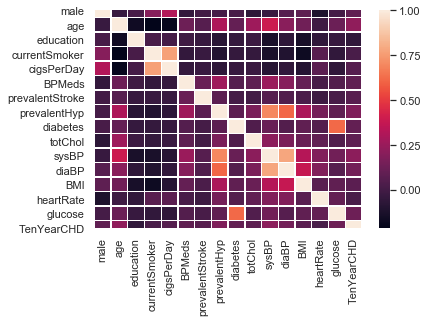

In [28]:
# correlation matrix plot
corrMatrix = df.corr()
sns.set(font_scale = 1)
g = sns.heatmap(corrMatrix, linewidths=.3)
plt.show()

In [29]:
df.describe(include = "all")
#sns.pairplot(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [30]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [31]:
# missing data check
df.isnull().sum()
## Removing missing value
# Drop rows which contain missing values
df.dropna(axis = 0, inplace = True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

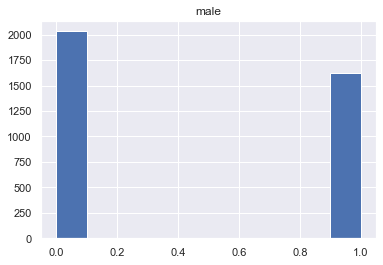

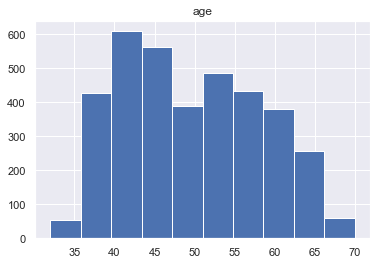

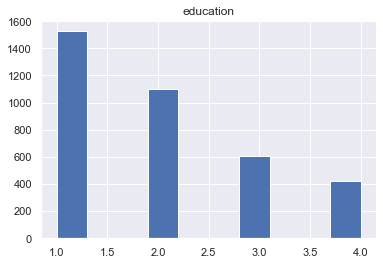

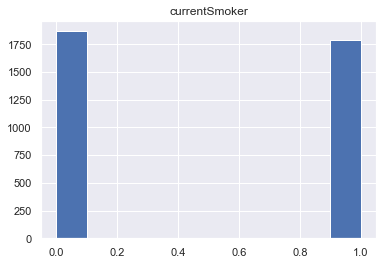

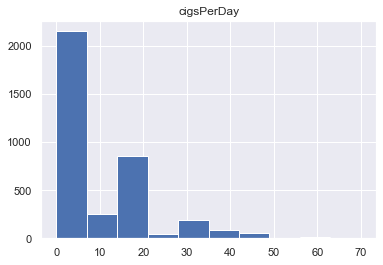

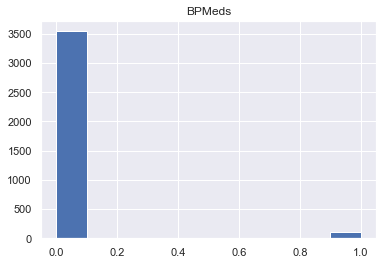

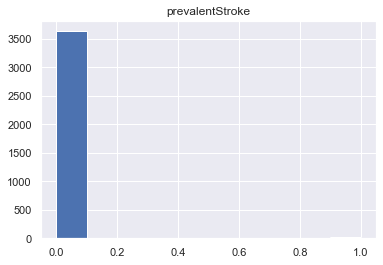

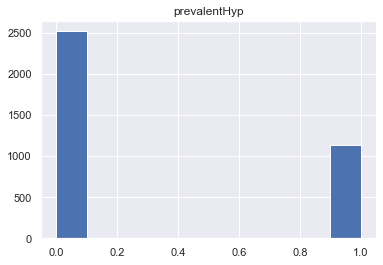

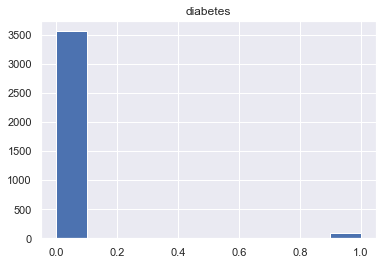

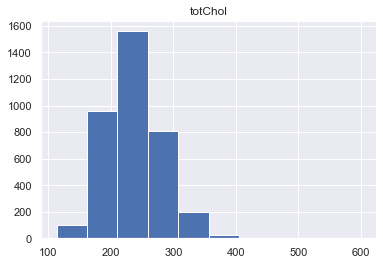

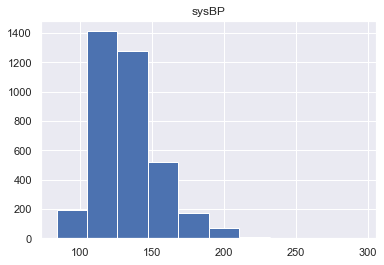

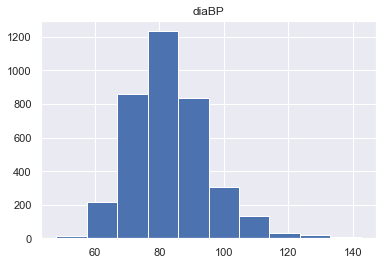

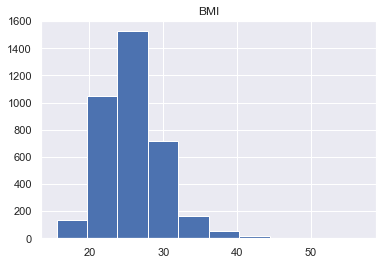

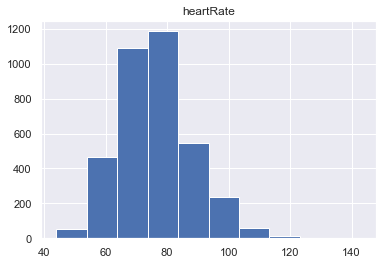

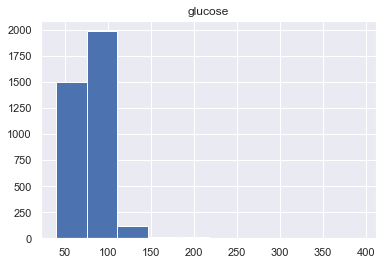

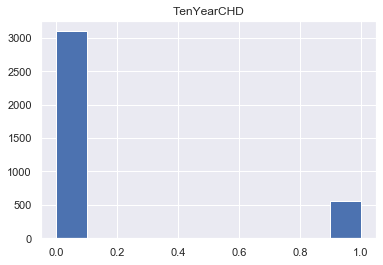

In [32]:
for i in df.columns:
    df.hist(column=i)
    plt.show()


In [33]:
df[['education']]=df[['education']].astype('int')
df[['cigsPerDay']]=df[['cigsPerDay']].astype('int')
df[['BPMeds']]=df[['BPMeds']].astype('int')
df[['glucose']]=df[['glucose']].astype('int')
df[['totChol']]=df[['totChol']].astype('int')
df[['heartRate']]=df[['heartRate']].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
male               3656 non-null int64
age                3656 non-null int64
education          3656 non-null int64
currentSmoker      3656 non-null int64
cigsPerDay         3656 non-null int64
BPMeds             3656 non-null int64
prevalentStroke    3656 non-null int64
prevalentHyp       3656 non-null int64
diabetes           3656 non-null int64
totChol            3656 non-null int64
sysBP              3656 non-null float64
diaBP              3656 non-null float64
BMI                3656 non-null float64
heartRate          3656 non-null int64
glucose            3656 non-null int64
TenYearCHD         3656 non-null int64
dtypes: float64(3), int64(13)
memory usage: 485.6 KB


In [34]:
# value by the outcome variable, TenYearCHD, which is the heart disease.
df.groupby('TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.424330,48.708938,2.007099,0.484995,8.758632,0.023879,0.004195,0.275895,0.020652,235.169732,130.280736,82.148919,25.642975,75.626331,80.620200
1,0.551167,54.278276,1.827648,0.511670,10.488330,0.066427,0.014363,0.509874,0.062837,246.350090,143.981149,87.157989,26.569838,76.310592,88.732496


# Remove outliers
# using IsolationForest from sklearn.ensemble import 

In [35]:
from sklearn.ensemble import IsolationForest

final_cols = ['male','age', 'education', 
              'currentSmoker', 'BPMeds', 'prevalentStroke',
                'diabetes','totChol',
                'sysBP', 'BMI', 'heartRate', 'TenYearCHD']
df_var = df[final_cols]

# fit the model
clf = IsolationForest(max_samples=100, random_state=2020)
clf.fit(df_var)
outlier_bool = clf.predict(df_var)

/Users/seonwookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/seonwookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/seonwookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [36]:
outlier_index = []
for val in outlier_bool:
    if val == 1:
        outlier_index.append(True)
    else:
        outlier_index.append(False)

In [37]:
outlier_index

[True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,


In [38]:
df_final = df_var[outlier_index]

In [39]:
outlier_index.count(True)

3290

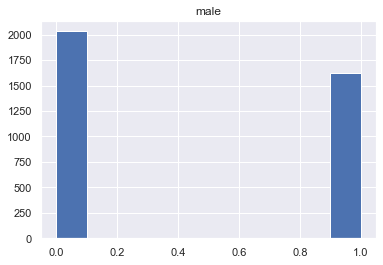

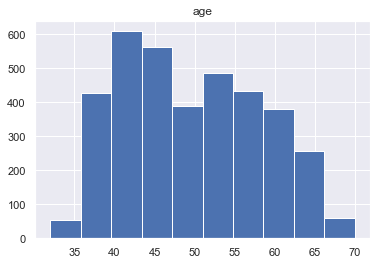

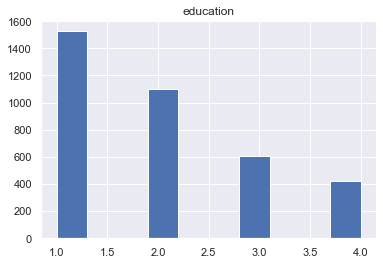

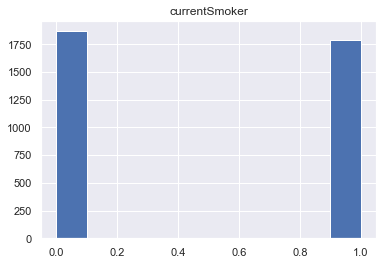

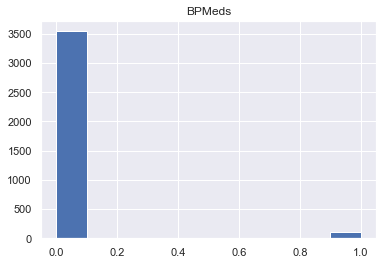

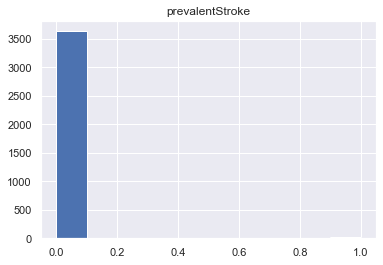

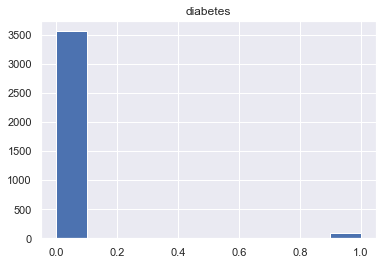

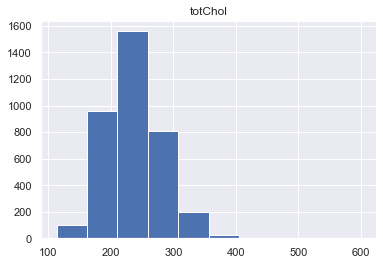

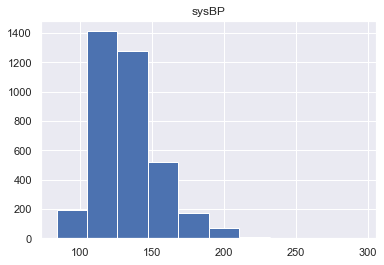

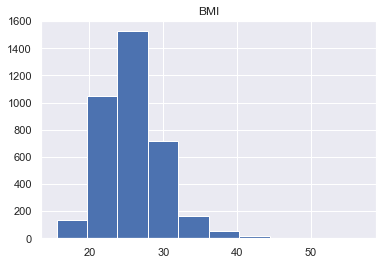

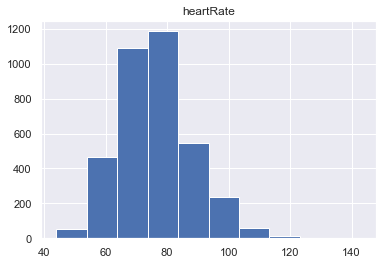

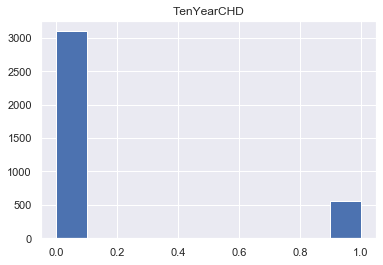

In [40]:
for i in df_final.columns:
    df.hist(column=i)
    plt.show()

In [41]:
# variable selection
x = df_final.iloc[:,:-1]
y = df_final.TenYearCHD

In [42]:
# 15.2% has heart disease (557/3656)
df['TenYearCHD'].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

# Split a training dataset & test dataset 
training data (70% n = 2,303) / test data (30%, n = 987)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2020)

# Logistic Regression

In [44]:
# Instantiate logistic regression model 
lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto',
                           C=100.0, random_state=2020)
lr.fit(x_train,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Logistic regression accuracy by test data
lr.score(x_test,y_test)
# 0.900

0.8996960486322189

In [46]:
# logtistic regression table
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.285669
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2303
Model:                          Logit   Df Residuals:                     2292
Method:                           MLE   Df Model:                           10
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                 0.07919
Time:                        20:53:52   Log-Likelihood:                -657.90
converged:                      False   LL-Null:                       -714.47
Covariance Type:            nonrobust   LLR p-value:                 1.232e-19
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.3141      0.153      2.053      0.040       0.014       0.614
age                 0.0352      0.009      3.861  

/Users/seonwookim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


If you see the below confusion matrix, there are too many false negative. It means that the the logistic prediction model cannot catch actual heart disease people.

In [47]:
# predicted value (0 or 1)
y_lr_pred = lr.predict(x_test)

Text(0.5, 1, 'Logistic regression result')

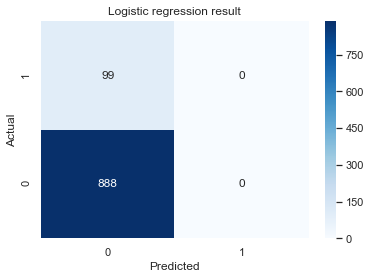

In [48]:
# logistic regression confusion matrix
cm = metrics.confusion_matrix(y_test, y_lr_pred, labels=[0, 1])
ax = plt.subplot()
sns.heatmap(cm, fmt=".0f", cmap = 'Blues', annot=True)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic regression result')

In [75]:
lo_cols = ['male','age', 'education','currentSmoker', 'sysBP', 'heartRate']
x_train_lo = x_train[lo_cols]
x_test_lo = x_test[lo_cols]

In [77]:
# logtistic regression table
logit_model=sm.Logit(y_train,x_train_lo)
result2=logit_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.288618
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2303
Model:                          Logit   Df Residuals:                     2297
Method:                           MLE   Df Model:                            5
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                 0.06968
Time:                        21:13:24   Log-Likelihood:                -664.69
converged:                       True   LL-Null:                       -714.47
Covariance Type:            nonrobust   LLR p-value:                 6.511e-20
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
male              0.2889      0.150      1.930      0.054      -0.004       0.582
age               0.

In [80]:
# Instantiate logistic regression model 
lr2 = LogisticRegression(solver = 'liblinear', multi_class = 'auto',
                           C=100.0, random_state=2020)
lr2.fit(x_train_lo,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
lr2.score(x_test_lo,y_test)
# 0.900

0.8996960486322189

In [83]:
# predicted value (0 or 1)
y_lr2_pred = lr2.predict(x_test_lo)

Text(0.5, 1, 'Logistic regression result')

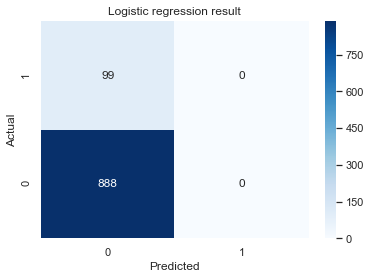

In [85]:
# logistic regression confusion matrix
cm2 = metrics.confusion_matrix(y_test, y_lr2_pred, labels=[0, 1])
ax = plt.subplot()
sns.heatmap(cm2, fmt=".0f", cmap = 'Blues', annot=True)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic regression result')

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

RandF = RandomForestClassifier(n_estimators=1000, random_state=2020,
                              max_depth = 5,criterion = 'gini')
RandF.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2020,
                       verbose=0, warm_start=False)

In [50]:
# Randomforest accuracy score
RandF.score(x_test, y_test)

0.8996960486322189

In [51]:
y_pred = RandF.predict(x_test)
# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print('R-Squared:', r2)

Mean squared error: 0.10030395136778116
R-Squared: -0.11148648648648685


In [52]:
# predicted value (0 or 1)
y_RandF_pred = RandF.predict(x_test)

In [53]:
print(classification_report(y_test, y_RandF_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       888
           1       0.00      0.00      0.00        99

    accuracy                           0.90       987
   macro avg       0.45      0.50      0.47       987
weighted avg       0.81      0.90      0.85       987



/Users/seonwookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5, 1, 'Random Forest result')

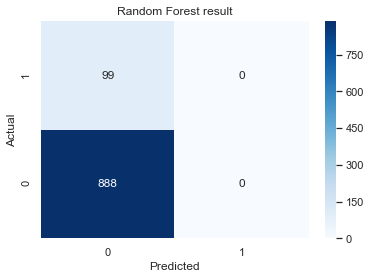

In [54]:
# logistic regression confusion matrix
cm = metrics.confusion_matrix(y_test, y_RandF_pred, labels=[0, 1])
ax = plt.subplot()
sns.heatmap(cm, fmt=".0f", cmap = 'Blues', annot=True)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest result')

# Gradient boosting

In [55]:
from xgboost import XGBClassifier

Gboosting = XGBClassifier(eta = 1, max_depth = 5, gamma = 0,
                          min_child_weight=6,
                         objective= 'binary:logistic')
Gboosting.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# Gradient boosting accuracy score
Gboosting.score(x_test, y_test)

0.8814589665653495

In [57]:
# predicted value (0 or 1)
y_Gboosting_pred = Gboosting.predict(x_test)

In [58]:
print(classification_report(y_test, y_Gboosting_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       888
           1       0.32      0.16      0.21        99

    accuracy                           0.88       987
   macro avg       0.62      0.56      0.58       987
weighted avg       0.85      0.88      0.86       987



Text(0.5, 1, 'Gradient boosting result')

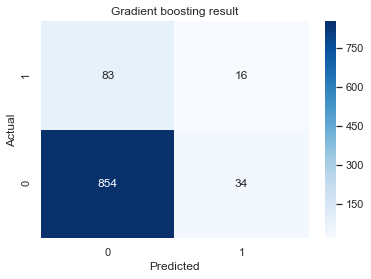

In [59]:
# logistic regression confusion matrix
cm = metrics.confusion_matrix(y_test, y_Gboosting_pred, labels=[0, 1])
ax = plt.subplot()
sns.heatmap(cm, fmt=".0f", cmap = 'Blues', annot=True)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Gradient boosting result')

# Ensemble

In [60]:
# each model probability
y_lr_pred_prob = lr.predict_proba(x_test) # logistic
y_RandF_pred_prob = RandF.predict_proba(x_test) # randomforest
y_Gboosting_pred_prob = Gboosting.predict_proba(x_test) # Gradient boosting

In [61]:
# ensenble calculation
pred_sum = y_lr_pred + y_RandF_pred + y_Gboosting_pred

In [62]:
# ensemble score count
unique, counts = np.unique(pred_sum, return_counts=True)
dict(zip(unique, counts))

{0: 937, 1: 50}

In [63]:
# predictition based on ensemble
ensemble_pred = []

for item in pred_sum: 
    if item >= 2:
        ensemble_pred.append(1)
    else:
        ensemble_pred.append(0)

Text(0.5, 1, 'Ensemble result')

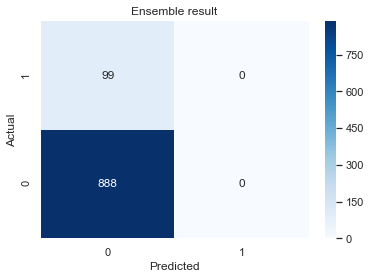

In [64]:
# Ensemble
cm = metrics.confusion_matrix(y_test, ensemble_pred, labels=[0, 1])
ax = plt.subplot()
sns.heatmap(cm, fmt=".0f", cmap = 'Blues', annot=True)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Ensemble result')

In [65]:
# Ensemble accuracy
(888+0)/(888+0+99+0)

0.8996960486322189

In [66]:
y_test.value_counts()

0    888
1     99
Name: TenYearCHD, dtype: int64

# Randomforest hyperparameter tune

In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 110, num = 30)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 9, 13, 16, 20, 24, 28, 31, 35, 39, 42, 46, 50, 54, 57, 61, 65, 69, 72, 76, 80, 83, 87, 91, 95, 98, 102, 106, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.3s
/Users/seonwookim/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [69]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': True}

In [70]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [71]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_train, y_train)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_train, y_train)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0165 degrees.
Accuracy = 82.33%.
Model Performance
Average Error: 0.0886 degrees.
Accuracy = 5.12%.
Improvement of -93.79%.
